<div style="text-align:center;font-size:22pt; font-weight:bold;color:white;border:solid black 1.5pt;background-color:#1e7263;">
    01- Model Capacity in Deep Leanring: Practical Project <br> Bank Marketing Prediction
</div>

In [1]:
# ======================================================================= #
# Course: Deep Learning Complete Course (CS-501)
# Author: Dr. Saad Laouadi
# Institution: Quant Coding Versity Academy
#
# ==========================================================
# Lesson: Practice Model Capacity In Deep Learning
#         Hands-on Prject 
# ==========================================================
# Learning Objectives
# ===================
# This notebooks 
# 1. Project overview
# 2. 
# =======================================================================
#          Copyright © Dr. Saad Laouadi 2025
# =======================================================================

In [ ]:
# ============================================================================ #
#                         Environment Path Configuration                       #
# ============================================================================ #
#
# Purpose:
#   Configure the system PATH to use Python executables from the active virtual 
#   environment instead of global installations.
#
# Usage:
#   1. First verify if configuration is needed by running: !which python
#   2. If the output shows the global Python installation rather than your 
#      virtual environment, execute this configuration block
#
# Note:
#   This configuration is typically only needed for JupyterLab Desktop or 
#   similar standalone installations. Web-based JupyterLab or properly 
#   configured environments should not require this adjustment.
# ============================================================================ #

import os
import sys

env_path = os.path.dirname(sys.executable)
os.environ['PATH'] = f"{env_path}:{os.environ['PATH']}"

In [93]:
# ==================================================== #
#        Load Required Libraries
# ==================================================== #

from pprint import pprint
import requests
import zipfile
import io
import shutil
from datetime import datetime
from typing import Tuple, Dict, List


# Disable Metal API Validation
os.environ["METAL_DEVICE_WRAPPER_TYPE"] = "0"  


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score

import optuna

from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_optimization_history
from optuna.visualization.matplotlib import plot_parallel_coordinate
from optuna.visualization.matplotlib import plot_contour
from optuna.visualization.matplotlib import plot_slice
from optuna.visualization.matplotlib import plot_edf
from optuna.visualization.matplotlib import plot_rank


import tensorflow as tf

print("="*72)

%reload_ext watermark
%watermark -a "Dr. Saad Laouadi" -u -d -m

print("="*72)
print("Imported Packages and Their Versions:")
print("="*72)

%watermark -iv
print("="*72)

# Global Config
RANDOM_STATE = 101

Author: Dr. Saad Laouadi

Last updated: 2025-01-11

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 24.1.0
Machine     : arm64
Processor   : arm
CPU cores   : 16
Architecture: 64bit

Imported Packages and Their Versions:
sklearn   : 1.5.1
seaborn   : 0.13.2
numpy     : 1.26.4
pandas    : 2.2.2
tensorflow: 2.16.2
matplotlib: 3.9.2
optuna    : 4.1.0
requests  : 2.32.3



# Bank Marketing Prediction Project

## Project Overview
This project focuses on predicting whether a client will subscribe to a bank term deposit using machine learning techniques. We'll implement a deep learning solution using Python and the Keras API.

## Dataset Description

The dataset comes from a **Portuguese banking institution's direct marketing campaigns**. The marketing campaigns were based on phone calls, often requiring multiple contacts with the same client.

### Features Description

#### Bank Client Data
| Feature    | Type        | Description                                     |
|------------|-------------|-------------------------------------------------|
| age        | numeric     | Client's age                                    |
| job        | categorical | Type of job (admin, technician, etc.)           |
| marital    | categorical | Marital status                                  |
| education  | categorical | Education level                                 |
| default    | categorical | Has credit in default?                          |
| balance    | numeric     | Average yearly balance in euros                 |
| housing    | categorical | Has housing loan?                               |
| loan       | categorical | Has personal loan?                              |

#### Campaign Data

| Feature    | Type        | Description                                     |
|------------|-------------|-------------------------------------------------|
| contact    | categorical | Contact communication type                      |
| day        | numeric     | Last contact day of the month                   |
| month      | categorical | Last contact month of year                      |
| duration   | numeric     | Last contact duration in seconds                |
| campaign   | numeric     | Number of contacts for this campaign            |
| pdays      | numeric     | Days since last contact from previous campaign  |
| previous   | numeric     | Number of contacts before this campaign         |
| poutcome   | categorical | Outcome of the previous campaign                |

#### Target Variable
- **y (binary)**: Has the client subscribed to a term deposit? (yes/no)

## Project Steps

### 1. Data Preprocessing
- Load and inspect the dataset
- Handle missing values
- Encode categorical variables
- Scale numerical features
- Split data into training and testing sets

### 2. Exploratory Data Analysis (EDA)
- Statistical summary of features
- Distribution analysis
- Correlation analysis
- Feature importance analysis
- Target variable distribution

### 3. Model Development
- Design neural network architecture
- Implementation using Keras API
- Model configuration and compilation
- Training and validation

### 4. Model Evaluation
- Performance metrics analysis
  - Accuracy
  - Precision
  - Recall
  - F1-Score
  - ROC-AUC
- Confusion matrix
- Learning curves analysis

### 5. Model Optimization
- Hyperparameter tuning
- Cross-validation
- Model architecture optimization
- Handling class imbalance

### 6. Model Deployment
- Save and load model
- Create prediction pipeline
- Model serving considerations

## Technical Requirements
- Python 3.8+
- Key Libraries:
  - TensorFlow/Keras
  - NumPy
  - Pandas
  - Scikit-learn
  - Matplotlib
  - Seaborn

# =============================================================================
# Deep Learning Model Development Roadmap: Bank Marketing Prediction
# =============================================================================

### 1. Data Preparation Phase
   - Load Bank Marketing Dataset
   - Initial data inspection and summary statistics
   - Check for missing values and data consistency
   - Identify feature types:
     * Numerical Features: age, balance, day, duration, campaign, pdays, previous
     * Categorical Features: job, marital, education, default, housing, loan, contact, month, poutcome
   - Target variable analysis (y - subscription status)

### 2. Exploratory Data Analysis (EDA)
   - Distribution analysis of target variable (subscription rates)
   - Feature-target relationships:
     * Age vs subscription probability
     * Balance vs subscription probability
     * Campaign contact patterns
   - Categorical feature analysis:
     * Education level impact
     * Job type distribution
     * Marital status influence
   - Campaign-specific analysis:
     * Previous campaign success rates
     * Contact timing patterns
     * Duration vs success rate
   - Correlation analysis and feature relationships

### 3. Data Preprocessing
   - Numerical Features
     * Feature scaling (StandardScaler)
     * Handle outliers in balance and duration
     * Transform skewed distributions
     * Handle 'pdays' special values (-1 for no previous contact)
   - Categorical Features
     * One-hot encoding vs Label encoding
     * Handle high cardinality in 'job' category
     * Create dummy variables for categorical features
   - Feature Engineering
     * Create interaction terms
     * Derive new features from campaign data
     * Time-based feature engineering (day, month)

### 4. Data Splitting and Balance
   - Handle class imbalance:
     * Analyze subscription ratio
     * Consider SMOTE or class weights
   - Train-Validation-Test split
     * Stratified splitting
     * Maintain temporal order (if relevant)
   - Data validation checks

### 5. Model Development
   - Neural Network Architecture Design
     * Input layer configuration for mixed features
     * Hidden layer design
     * Binary classification output layer
   - Model Configuration
     * Activation functions selection
     * Loss function (binary crossentropy)
     * Optimizer selection and configuration
   - Implementation considerations:
     * Class weight handling
     * Batch size selection
     * Learning rate strategy

### 6. Training and Monitoring
   - Training Setup
     * BatchSize and epochs configuration
     * Learning rate schedule
     * Validation monitoring
   - Callback Implementation
     * Early stopping
     * Model checkpointing
     * Learning rate reduction
   - Training Monitoring
     * Loss and accuracy tracking
     * Class prediction balance
     * Validation performance

### 7. Model Evaluation
   - Classification Metrics
     * Accuracy, Precision, Recall
     * F1-Score
     * ROC-AUC curve
   - Business Metric Analysis
     * Cost-benefit analysis
     * Campaign efficiency metrics
   - Model Behavior Analysis
     * Feature importance assessment
     * Prediction confidence analysis
     * Error case analysis

### 8. Model Optimization
   - Hyperparameter Tuning
     * Network architecture optimization
     * Learning rate fine-tuning
     * Regularization adjustment
   - Performance Improvement
     * Feature selection refinement
     * Ensemble methods consideration
     * Cross-validation implementation
   - Model Robustness
     * Sensitivity analysis
     * Threshold optimization
     * Model stability assessment

In [102]:
# ========================================================================= #
#       Bank Marketing Project
# ========================================================================= #

# 1. Download the dataset
def download_bank_dataset(save_path='data'):
    """
    Download the Bank Marketing dataset from UCI repository
    
    Parameters:
        save_path (str): Directory to save the dataset
    """
    # Create directory if it doesn't exist
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    
    # URL of the dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

    print("Downloading dataset...")
    response = requests.get(url)
    
    if response.status_code == 200:
        # Extract the zip file
        with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
            zip_ref.extractall(save_path)
            
        print(f"Dataset downloaded and extracted to {save_path}")
    else:
        print("Failed to download dataset")

        
def remove_macosx_artifacts(data_path: str) -> None:
    """
    Remove macOS-specific '__MACOSX' directory if it exists.
    
    Args:
        data_path (str): Path to the parent directory containing potential macOS artifacts
        
    Raises:
        OSError: If there's an error during directory removal
        TypeError: If data_path is not a string
    """
    try:
        macosx_dir = os.path.join(data_path, '__MACOSX')
        if os.path.exists(macosx_dir) and os.path.isdir(macosx_dir):
            shutil.rmtree(macosx_dir)
            print(f"Successfully removed macOS artifact directory: {macosx_dir}")
    except OSError as e:
        logger.error(f"Failed to remove macOS artifact directory: {str(e)}")
        raise
        
        
def remove_hidden_files(directory: str) -> None:
    """
    Remove all hidden files (files starting with '.') from the specified directory.
    
    Args:
        directory (str): Path to the directory to clean
        
    Raises:
        OSError: If there's an error accessing or removing files
    """
    # logger = logging.getLogger('system_cleaner')
    
    try:
        # Get the full path to the bank-additional directory
        target_dir = os.path.join(data_path, 'bank-additional')
        
        # Iterate through files
        for filename in os.listdir(target_dir):
            if filename.startswith('.'):
                file_path = os.path.join(target_dir, filename)
                if os.path.isfile(file_path):
                    os.remove(file_path)
                    print(f"Removed hidden file: {filename}")
                    
    except OSError as e:
        print(f"Failed to remove hidden files: {str(e)}")
        raise
    except Exception as e:
        print(f"Unexpected error occurred: {str(e)}")
        raise        
        
# ========================================================================= #
#         Core Functionalities
# ========================================================================= #

def load_data(filepath: str) -> pd.DataFrame:
    """
    Load the bank marketing dataset and perform initial cleaning.
    
    Parameters:
        filepath (str): Path to the dataset CSV file
    
    Returns:
        pd.DataFrame: Cleaned dataset
    """
    # Read the dataset
    df = pd.read_csv(filepath, sep=';')
    
    # Convert column names to lowercase
    df.columns = df.columns.str.lower()
    
    # Strip whitespace from string columns
    object_columns = df.select_dtypes(include=['object']).columns
    df[object_columns] = df[object_columns].apply(lambda x: x.str.strip())
    
    return df

def display_basic_info(df: pd.DataFrame) -> None:
    """
    Display basic information about the dataset.
    
    Args:
        df (pd.DataFrame): Input dataset
    """
    print("="*72)
    print("Dataset Overview:")
    print("="*72)
    print("\nDataset Shape:", df.shape)
    print("\nFirst few rows:")
    print(df.head())
    
    print("\nDataset Information:")
    print("="*72)
    df.info()
    
    print("\nStatistical Summary:")
    print("="*72)
    print(df.describe())
    
    
def get_feature_groups(df: pd.DataFrame) -> Tuple[List[str], List[str]]:
    """
    Separate features into numerical and categorical groups.
    
    Parameters:
        df (pd.DataFrame): Input dataset
        
    Returns:
        Tuple[List[str], List[str]]: Lists of numerical and categorical column names
    """
    # Identify numeric and categorical columns
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()
    
    # Remove target variable if present
    if 'y' in numeric_features:
        numeric_features.remove('y')
    if 'y' in categorical_features:
        categorical_features.remove('y')
    
    return numeric_features, categorical_features


def analyze_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Analyze missing values in the dataset.
    
    Parameters:
        df (pd.DataFrame): Input dataset
        
    Returns:
        pd.DataFrame: Missing value analysis
    """
    # Calculate missing value statistics
    missing = pd.DataFrame({
        'count': df.isnull().sum(),
        'percentage': (df.isnull().sum() / len(df) * 100).round(2)
    })
    
    return missing[missing['count'] > 0].sort_values('percentage', ascending=False)


def analyze_target_distribution(df: pd.DataFrame) -> Dict[str, float]:
    """
    Analyze the distribution of the target variable.
    
    Parameters:
        df (pd.DataFrame): Input dataset
        
    Returns:
        Dict[str, float]: Target distribution statistics
    """
    target_dist = df['y'].value_counts(normalize=True)
    target_counts = df['y'].value_counts()
    
    # Calculate imbalance ratio with explicit float conversion and rounding
    imbalance_ratio = float(target_counts.min()) / float(target_counts.max())
    
    return {
        'distribution': {k: float(v) for k, v in target_dist.to_dict().items()},
        'counts': target_counts.to_dict(),
        'imbalance_ratio': round(imbalance_ratio, 3)
    }


def preprocess_numeric_features(df: pd.DataFrame,
                                numeric_features: List[str]) -> Tuple[pd.DataFrame, StandardScaler]:
    """
    Preprocess numerical features using StandardScaler.
    
    Parameters:
        df (pd.DataFrame): Input dataset
        numeric_features (List[str]): List of numerical feature names
        
    Returns:
        Tuple[pd.DataFrame, StandardScaler]: Preprocessed data and fitted scaler
    """
    scaler = StandardScaler()
    df_processed = df.copy()
    
    # Scale numeric features
    df_processed[numeric_features] = scaler.fit_transform(df[numeric_features])
    
    return df_processed, scaler


def encode_categorical_features(df: pd.DataFrame,
                              categorical_features: List[str]
                             ) -> Tuple[pd.DataFrame, OneHotEncoder]:
    """
    Encode categorical features using OneHotEncoder.
    
    Parameters:
        df (pd.DataFrame): Input dataset
        categorical_features (List[str]): List of categorical feature names
        
    Returns:
        Tuple[pd.DataFrame, OneHotEncoder]: DataFrame with one-hot encoded features 
        and the fitted encoder
    """
    df_encoded = df.copy()
    
    # Initialize OneHotEncoder with appropriate parameters
    encoder = OneHotEncoder(
        sparse_output=False,  # Return dense array instead of sparse matrix
        handle_unknown='ignore',  # Handle new categories in test data
        drop='if_binary'  # Drop one category for binary features to avoid multicollinearity
    )
    
    # Fit and transform the categorical features
    encoded_features = encoder.fit_transform(df[categorical_features])
    
    # Get feature names after encoding
    feature_names = encoder.get_feature_names_out(categorical_features)
    
    # Create a DataFrame with encoded features
    encoded_df = pd.DataFrame(
        encoded_features,
        columns=feature_names,
        index=df.index
    )
    
    # Drop original categorical columns
    df_encoded = df_encoded.drop(columns=categorical_features)
    
    # Concatenate encoded features with original numeric features
    df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
    
    return df_encoded, encoder


def encode_target(df: pd.DataFrame, target_column: str) -> Tuple[pd.DataFrame, LabelEncoder]:
    """
    Encode the target variable using LabelEncoder.
    
    Parameters:
        df (pd.DataFrame): Input dataset
        target_column (str): Name of the target column
        
    Returns:
        Tuple[pd.DataFrame, LabelEncoder]: DataFrame with encoded target and the fitted encoder
    """
    df_encoded = df.copy()
    encoder = LabelEncoder()
    
    # Fit and transform the target variable
    df_encoded[target_column] = encoder.fit_transform(df[target_column])
    
    return df_encoded, encoder


def plot_numeric_distributions(df: pd.DataFrame, 
                               numeric_features: List[str],
                               target_col: str = 'y') -> None:
    """
    Plot distributions of numeric features with respect to target variable.
    
    Parameters:
        df (pd.DataFrame): Input dataset
        numeric_features (List[str]): List of numerical feature names
        target_col (str): Name of target column
    """
    n_features = len(numeric_features)
    n_cols = 2
    n_rows = (n_features + 1) // 2
    
    plt.figure(figsize=(15, 5 * n_rows))
    
    for i, feature in enumerate(numeric_features, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(x=target_col, y=feature, data=df)
        plt.title(f'Distribution of {feature} by {target_col}')
        
    plt.tight_layout()
    plt.show()

    
def plot_categorical_distributions(df: pd.DataFrame, 
                                   categorical_features: List[str],
                                   target_col: str = 'y') -> None:
    """
    Plot distributions of categorical features with respect to target variable.
    
    Parameters:
        df (pd.DataFrame): Input dataset
        categorical_features (List[str]): List of categorical feature names
        target_col (str): Name of target column
    """
    n_features = len(categorical_features)
    n_cols = 2
    n_rows = (n_features + 1) // 2
    
    plt.figure(figsize=(15, 5 * n_rows))
    
    for i, feature in enumerate(categorical_features, 1):
        plt.subplot(n_rows, n_cols, i)
        df_grouped = df.groupby(feature)[target_col].value_counts(normalize=True).unstack()
        df_grouped.plot(kind='bar', stacked=True)
        plt.title(f'Distribution of {target_col} by {feature}')
        plt.legend(title=target_col)
        plt.xticks(rotation=45)
        
    plt.tight_layout()
    plt.show()
    

def prepare_data_for_modeling(df: pd.DataFrame, target_col: str = 'y', 
                              test_size: float = 0.2, random_state: int = 42) -> Tuple:
    """
    Prepare data for modeling by splitting into train and test sets.
    
    Parameters:
        df (pd.DataFrame): Preprocessed dataset
        target_col (str): Name of target column
        test_size (float): Proportion of data to use for testing
        random_state (int): Random seed for reproducibility
        
    Returns:
        Tuple: (X_train, X_test, y_train, y_test)
    """
    # Prepare features and target
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    # Encode target if it's categorical
    if y.dtype == 'object':
        y = LabelEncoder().fit_transform(y)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    return X_train, X_test, y_train, y_test


def generate_data_summary(df: pd.DataFrame) -> Dict:
    """
    Generate a comprehensive summary of the dataset.
    
    Parameters:
        df (pd.DataFrame): Input dataset
        
    Returns:
        Dict: Summary statistics and information
    """
    numeric_features, categorical_features = get_feature_groups(df)
    
    summary = {
        'dataset_shape': df.shape,
        'numeric_features': {
            'count': len(numeric_features),
            'names': numeric_features,
            'statistics': df[numeric_features].describe().to_dict()
        },
        'categorical_features': {
            'count': len(categorical_features),
            'names': categorical_features,
            'unique_values': {col: df[col].nunique() for col in categorical_features}
        },
        'target_distribution': analyze_target_distribution(df),
        'missing_values': analyze_missing_values(df).to_dict()
    }
    
    return summary

In [3]:
# The directory where the data will be saved
data_path = "../../datasets/classification/bank_marketing" # change this path based on your requirements

# Download the dataset
download_bank_dataset(save_path = data_path)

Dataset downloaded and extracted to ../../datasets/classification/bank_marketing


In [11]:
# List the content of data directory
os.listdir(data_path)

['bank-additional']

In [10]:
# Remove `'__MACOSX' directory
remove_macosx_artifacts(data_path)

Successfully removed macOS artifact directory: ../../datasets/classification/bank_marketing/__MACOSX


In [15]:
# List the dir now
print(os.listdir(os.path.join(data_path, 'bank-additional')))

['.Rhistory', '.DS_Store', 'bank-additional-names.txt', 'bank-additional.csv', 'bank-additional-full.csv']


In [32]:
target_dir = os.path.join(data_path, 'bank-additional')
        
# Iterate through files
for filename in os.listdir(target_dir):
    if filename.startswith('.') and os.path.isfile(os.path.join(target_dir, filename)):
        print(filename)

.Rhistory
.DS_Store


In [33]:
# Clean the directory
remove_hidden_files(data_path)

Removed hidden file: .Rhistory
Removed hidden file: .DS_Store


In [34]:
os.listdir(target_dir)

['bank-additional-names.txt',
 'bank-additional.csv',
 'bank-additional-full.csv']

In [35]:
data_dir = os.path.join(data_path, 'bank-additional/bank-additional-full.csv')

In [37]:
# 2. Loading the dataset
data = load_data(data_dir)

In [39]:
# 3. Explore the data
display_basic_info(data)

Dataset Overview:

Dataset Shape: (41188, 21)

First few rows:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1

In [44]:
# Get numeric and categorical features
num_features, cat_features = get_feature_groups(data)
print(num_features)
print(cat_features)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [49]:
# assert that the number of numeric features plus categorical features
# is equal the total number of data features
assert len(num_features) + len(cat_features) == len(data.columns.to_list()) -1 

In [53]:
# Analyze the missing data
if len(analyze_missing_values(data))>0:
    print(analyze_missing_values(data))
else:
    print("No missing points found...")

No missing points found


In [82]:
# Analyze the target variable
from pprint import pprint
pprint(analyze_target_distribution(data))

{'distribution': {'no': 0.8873458288821987, 'yes': 0.11265417111780131},
 'counts': {'no': 36548, 'yes': 4640},
 'imbalance_ratio': 0.127}

In [105]:
# Process Numeric Features
df_num_processed, _ = preprocess_numeric_features(data, num_features)

In [106]:
df_num_processed

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.712460,0.331680,no
1,1.628993,services,married,high.school,unknown,no,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.712460,0.331680,no
2,-0.290186,services,married,high.school,no,yes,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.712460,0.331680,no
3,-0.002309,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.712460,0.331680,no
4,1.533034,services,married,high.school,no,no,yes,telephone,may,mon,...,-0.565922,0.195414,-0.349494,nonexistent,0.648092,0.722722,0.886447,0.712460,0.331680,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,-0.565922,0.195414,-0.349494,nonexistent,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,yes
41184,0.573445,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,-0.565922,0.195414,-0.349494,nonexistent,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,no
41185,1.533034,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,-0.204909,0.195414,-0.349494,nonexistent,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,no
41186,0.381527,technician,married,professional.course,no,no,no,cellular,nov,fri,...,-0.565922,0.195414,-0.349494,nonexistent,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,yes


In [110]:
# preprocess categorical features
df_processed, _ = encode_categorical_features(data, cat_features)

In [108]:
# Encode the target variable
df_processed, _ = encode_target(data, 'y')

In [111]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  object 
 11  job_admin.                     41188 non-null  float64
 12  job_blue-collar                41188 non-null 

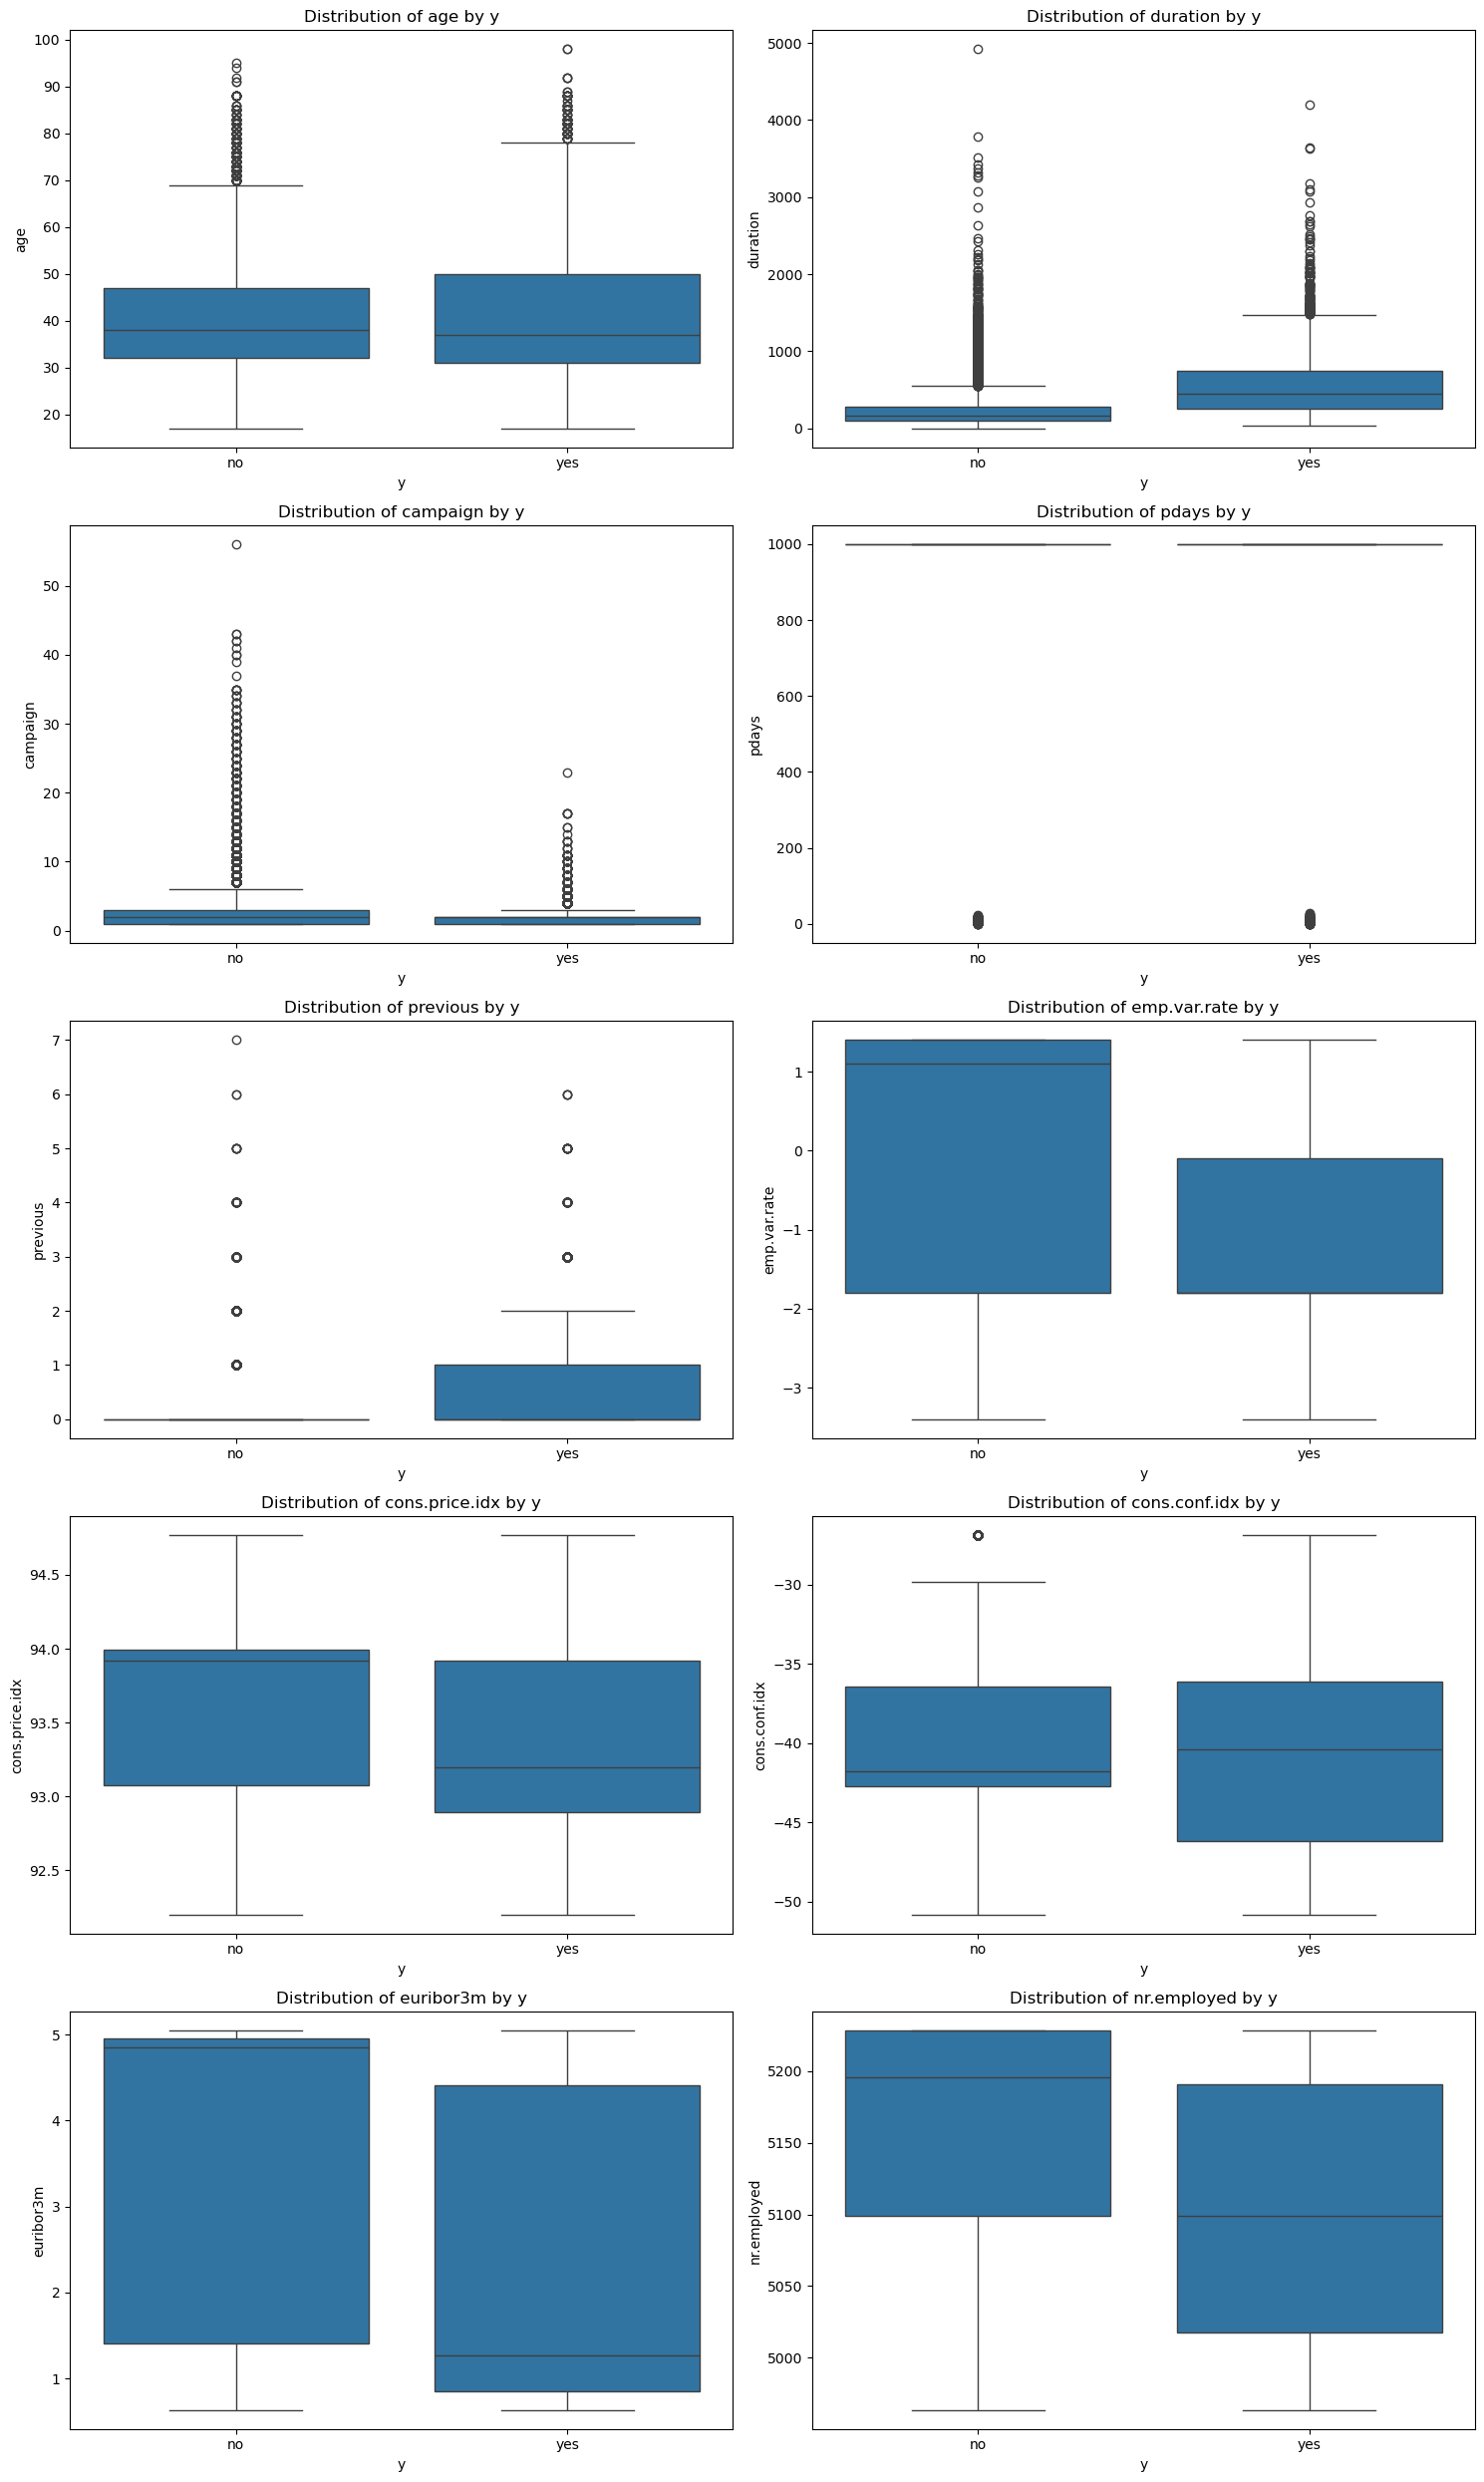

In [90]:
plot_numeric_distributions(data, num_features)

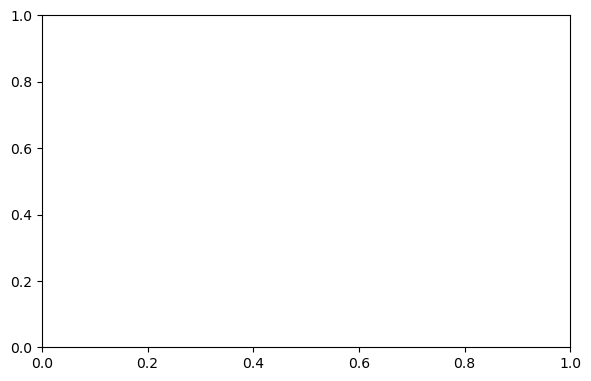

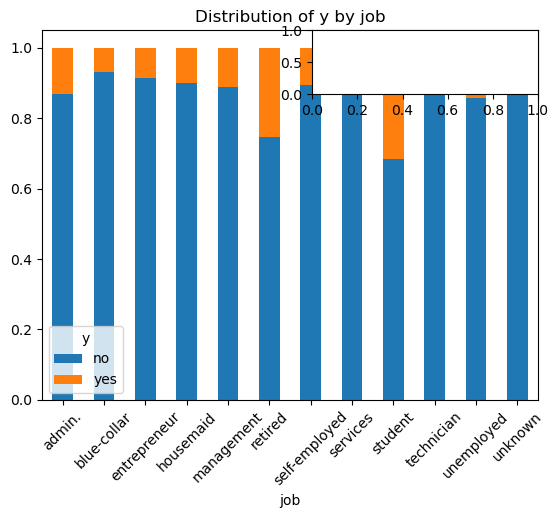

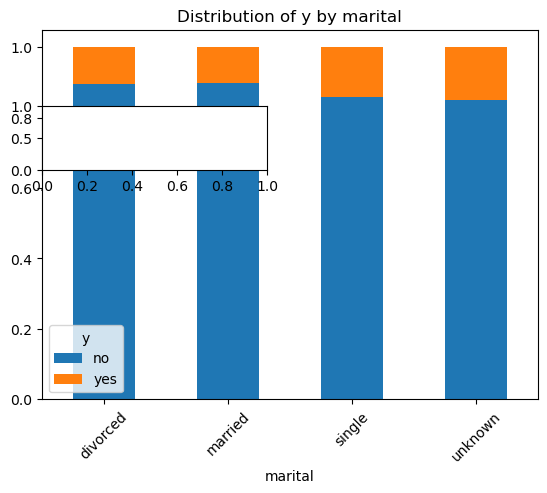

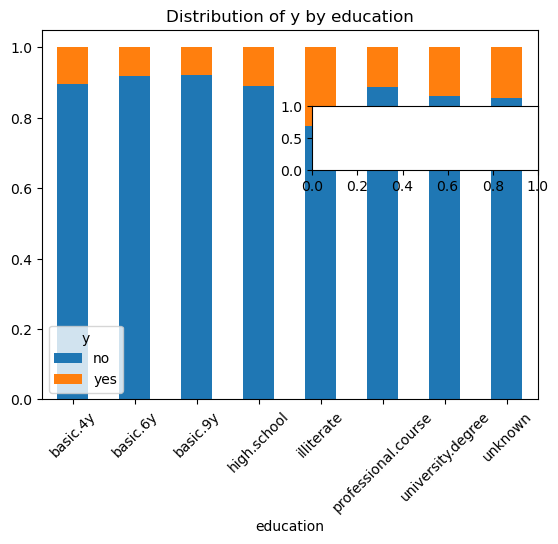

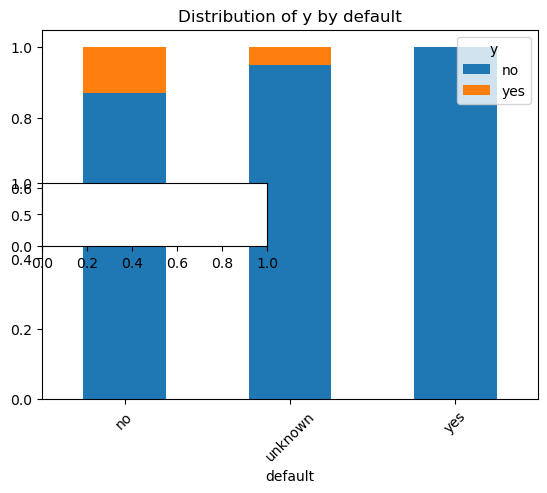

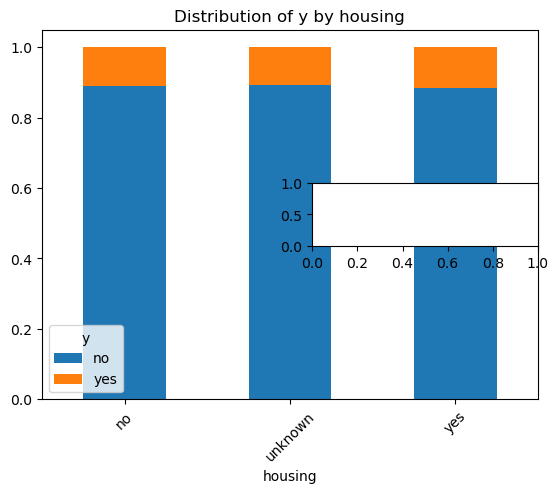

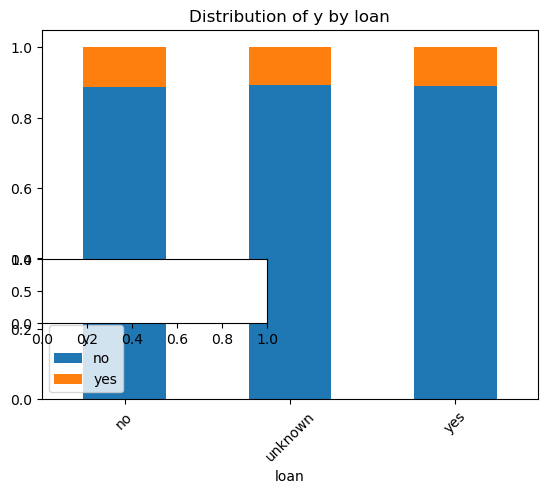

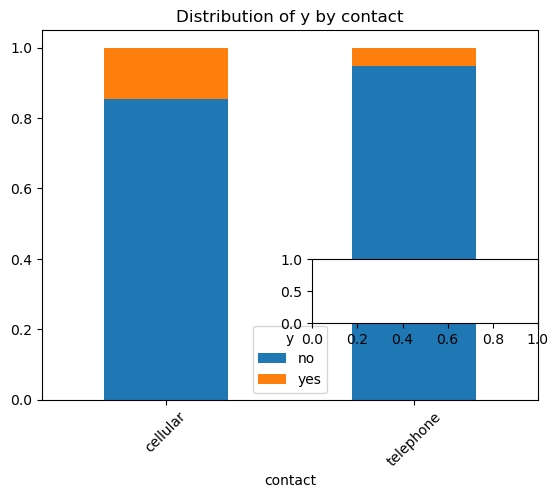

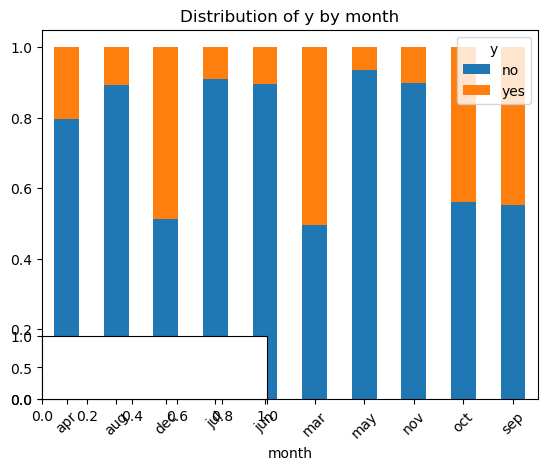

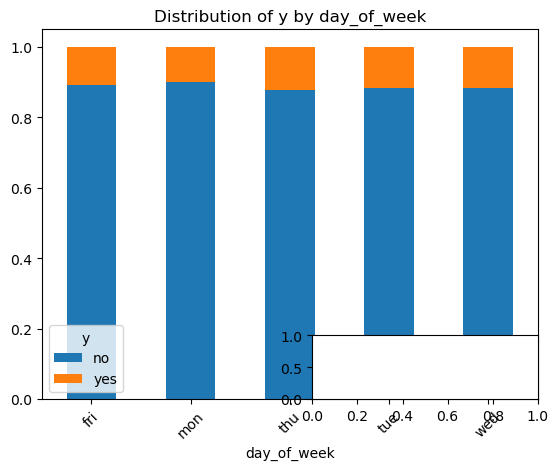

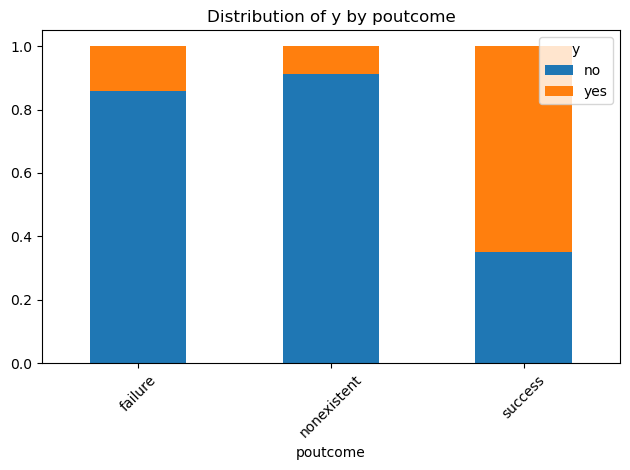

In [91]:
plot_categorical_distributions(data, cat_features)

In [83]:
generate_data_summary(data)

{'dataset_shape': (41188, 21),
 'numeric_features': {'count': 10,
  'names': ['age',
   'duration',
   'campaign',
   'pdays',
   'previous',
   'emp.var.rate',
   'cons.price.idx',
   'cons.conf.idx',
   'euribor3m',
   'nr.employed'],
  'statistics': {'age': {'count': 41188.0,
    'mean': 40.02406040594348,
    'std': 10.421249980934235,
    'min': 17.0,
    '25%': 32.0,
    '50%': 38.0,
    '75%': 47.0,
    'max': 98.0},
   'duration': {'count': 41188.0,
    'mean': 258.2850101971448,
    'std': 259.2792488364648,
    'min': 0.0,
    '25%': 102.0,
    '50%': 180.0,
    '75%': 319.0,
    'max': 4918.0},
   'campaign': {'count': 41188.0,
    'mean': 2.567592502670681,
    'std': 2.7700135429021127,
    'min': 1.0,
    '25%': 1.0,
    '50%': 2.0,
    '75%': 3.0,
    'max': 56.0},
   'pdays': {'count': 41188.0,
    'mean': 962.4754540157328,
    'std': 186.9109073447436,
    'min': 0.0,
    '25%': 999.0,
    '50%': 999.0,
    '75%': 999.0,
    'max': 999.0},
   'previous': {'count': 411

{'counts': {'no': 36548, 'yes': 4640},
 'distribution': {'no': 0.8873458288821987, 'yes': 0.11265417111780131},
 'imbalance_ratio': 0.127}


In [94]:
le = LabelEncoder()

In [95]:
le.fit_transform(data['y'])

array([0, 0, 0, ..., 0, 1, 0])

In [131]:
def encode_target(df: pd.DataFrame, target_column: str) -> Tuple[pd.DataFrame, LabelEncoder]:
    """
    Encode the target variable using LabelEncoder.
    
    Parameters:
        df (pd.DataFrame): Input dataset
        target_column (str): Name of the target column
        
    Returns:
        Tuple[pd.DataFrame, LabelEncoder]: DataFrame with encoded target and the fitted encoder
    """
    df_encoded = df.copy()
    print(df_encoded.head(3))
    encoder = LabelEncoder()
    
    # Fit and transform the target variable
    df_encoded[target_column] = encoder.fit_transform(df[target_column])
    
    return df_encoded, encoder


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [133]:
df, _ = encode_target(data, 'y')

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  

[3 rows x 21 columns]


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [137]:
df['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [135]:
df2, _ = encode_categorical_features(df, cat_features)

In [121]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  float64
 12  job_blue-collar                41188 non-null 

In [122]:
def preprocess_data(df: pd.DataFrame,
                    categorical_features: List[str],
                    numeric_features: List[str],
                    target_column: str) -> Tuple[pd.DataFrame, OneHotEncoder, StandardScaler, LabelEncoder]:
    """
    Preprocess the data by applying transformations in the correct order:
    1. Encode categorical features
    2. Scale numeric features
    3. Encode target variable
    
    Parameters:
        df (pd.DataFrame): Input dataset
        categorical_features (List[str]): List of categorical feature names
        numeric_features (List[str]): List of numerical feature names
        target_column (str): Name of the target column
        
    Returns:
        Tuple containing:
        - Preprocessed DataFrame
        - Fitted OneHotEncoder
        - Fitted StandardScaler
        - Fitted LabelEncoder
    """
    # 1. First encode categorical features
    df_processed, cat_encoder = encode_categorical_features(df, categorical_features)
    
    # 2. Then scale numeric features
    df_processed, num_scaler = preprocess_numeric_features(df_processed, numeric_features)
    
    # 3. Finally encode the target
    df_processed, target_encoder = encode_target(df_processed, target_column)
    
    return df_processed, cat_encoder, num_scaler, target_encoder

In [126]:
df, _, _ , _ = preprocess_data(data, cat_features, num_features, 'y')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  float64
 1   duration                       41188 non-null  float64
 2   campaign                       41188 non-null  float64
 3   pdays                          41188 non-null  float64
 4   previous                       41188 non-null  float64
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  float64
 12  job_blue-collar                41188 non-null 

In [129]:
cat_enc,_ = encode_categorical_features(data, cat_features)

In [130]:
cat_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  object 
 11  job_admin.                     41188 non-null  float64
 12  job_blue-collar                41188 non-null 

In [138]:
from sklearn.utils.class_weight import compute_class_weight

def compute_balanced_weights(y):
    """
    Compute balanced class weights for imbalanced target variable.
    
    Parameters:
        y: Target variable (encoded)
    Returns:
        dict: Dictionary with class weights
    """
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y),
        y=y
    )
    return dict(zip(np.unique(y), class_weights))

In [139]:
compute_balanced_weights(data['y'])

{'no': 0.5634781656999015, 'yes': 4.438362068965517}

In [140]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

def handle_imbalanced_data(df: pd.DataFrame, 
                          target_column: str,
                          strategy: str = 'smote') -> pd.DataFrame:
    """
    Handle imbalanced dataset using various techniques.
    
    Parameters:
        df (pd.DataFrame): Preprocessed dataframe
        target_column (str): Name of target column
        strategy (str): Resampling strategy ('smote', 'undersample', or 'combine')
        
    Returns:
        pd.DataFrame: Resampled dataframe
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    if strategy == 'smote':
        # Use SMOTE to oversample minority class
        sampler = SMOTE(random_state=42)
        X_resampled, y_resampled = sampler.fit_resample(X, y)
    
    elif strategy == 'undersample':
        # Undersample majority class
        sampler = RandomUnderSampler(random_state=42)
        X_resampled, y_resampled = sampler.fit_resample(X, y)
    
    elif strategy == 'combine':
        # Combine SMOTE with undersampling
        over = SMOTE(sampling_strategy=0.5, random_state=42)  # Oversample to 50% ratio
        under = RandomUnderSampler(sampling_strategy=0.75, random_state=42)  # Further balance
        pipeline = Pipeline([('over', over), ('under', under)])
        X_resampled, y_resampled = pipeline.fit_resample(X, y)
    
    # Reconstruct dataframe
    df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
    df_resampled[target_column] = y_resampled
    
    return df_resampled

In [141]:
def preprocess_data(df: pd.DataFrame,
                    categorical_features: List[str],
                    numeric_features: List[str],
                    target_column: str,
                    handle_imbalance: str = None
                   ) -> Tuple[pd.DataFrame, OneHotEncoder, StandardScaler, LabelEncoder]:
    """
    Enhanced preprocessing pipeline that handles class imbalance.
    
    Parameters:
        df (pd.DataFrame): Input dataset
        categorical_features (List[str]): List of categorical feature names
        numeric_features (List[str]): List of numerical feature names
        target_column (str): Name of the target column
        handle_imbalance (str): Strategy for handling imbalance ('smote', 'undersample', 'combine', or None)
        
    Returns:
        Tuple containing:
        - Preprocessed DataFrame
        - Fitted OneHotEncoder
        - Fitted StandardScaler
        - Fitted LabelEncoder
    """
    # 1. First encode categorical features
    df_processed, cat_encoder = encode_categorical_features(df, categorical_features)
    
    # 2. Then scale numeric features
    df_processed, num_scaler = preprocess_numeric_features(df_processed, numeric_features)
    
    # 3. Encode the target
    df_processed, target_encoder = encode_target(df_processed, target_column)
    
    # 4. Handle class imbalance if specified
    if handle_imbalance:
        df_processed = handle_imbalanced_data(df_processed, target_column, handle_imbalance)
    
    return df_processed, cat_encoder, num_scaler, target_encoder

In [146]:
# datasets.load_digits()